In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from requests import head
df = pd.read_csv('results.csv', header=None)

In [3]:
df

,0,1,2,3,4,5
0,0,ESOL,structural,probability_of_improvement,GCN,"[-0.8500000238418579, 0.4699999988079071, 0.46..."
1,0,ESOL,structural,expected_improvement,GCN,"[-6.124000072479248, -3.999000072479248, -3.99..."
2,0,ESOL,parametric,probability_of_improvement,GCN,"[-1.2300000190734863, -1.2300000190734863, -1...."
3,0,FreeSolv,structural,probability_of_improvement,GCN,"[-1.2100000381469727, -1.2100000381469727, -1...."
4,0,ESOL,parametric,expected_improvement,GCN,"[-2.5799999237060547, 0.9599999785423279, 0.95..."
5,0,FreeSolv,parametric,expected_improvement,GCN,"[-5.909999847412109, -5.909999847412109, -5.90..."
6,0,Lipophilicity,structural,expected_improvement,GCN,"[1.3799999952316284, 3.5999999046325684, 3.599..."
7,0,FreeSolv,structural,probability_of_improvement,GCN,"[-9.510000228881836, -3.9200000762939453, -3.9..."
8,0,FreeSolv,structural,expected_improvement,GAT,"[-7.650000095367432, -4.840000152587891, -3.65..."
9,0,ESOL,parametric,probability_of_improvement,GAT,"[-5.400000095367432, -2.4519999027252197, -0.8..."


In [4]:
def get_result(df, data, strategy, acquisition, layer):
    df = df[(df[1] == data) & (df[2] == strategy) & (df[3] == acquisition) & (df[4] == layer)][5].values
    if len(df) == 0:
        return None
    df = eval(df.tolist()[0])
    return df

In [5]:
array = get_result(df, "ESOL", "parametric", "expected_improvement", "GCN")

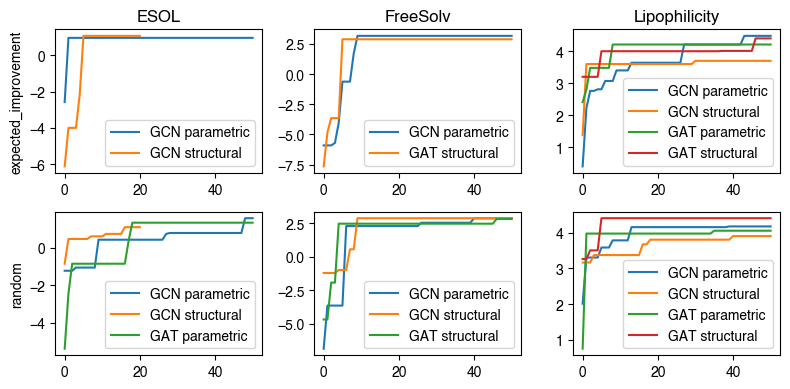

In [7]:
# set the default font to be Helvetica
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'



fig, axs = plt.subplots(2, 3, figsize=(8, 4))
for idx_data, data in enumerate(["ESOL", "FreeSolv", "Lipophilicity"]):
    for idx_acquisition, acquisition in enumerate(["expected_improvement", "probability_of_improvement"]):
        ax = axs[idx_acquisition, idx_data]
        for idx_layer, layer in enumerate(["GCN", "GAT", "GIN"]):
            for idx_strategy, strategy in enumerate(["parametric", "structural"]):
                array = get_result(df, data, strategy, acquisition, layer)
                if array is not None:
                    ax.plot(array, label=f"{layer} {strategy}")
                    ax.legend()

for idx_acquisition, acquisition in enumerate(["expected_improvement", "random"]):
    axs[idx_acquisition, 0].set_ylabel(acquisition)

for idx_data, data in enumerate(["ESOL", "FreeSolv", "Lipophilicity"]):
    axs[0, idx_data].set_title(data)

plt.tight_layout()